# INFORMATION RETRIEVAL LP01 

2301961084 - Vangelia Peace\
2301873182 - Matthew Liem\
2301853123 - Leonardo Ignatius\
2301869853 - Stephen Jasper\
2301894022 - Marco Tanawan

In [1]:
!pip install gensim==3.8.0

     |████████████████████████████████| 24.2 MB 1.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
!pip install wordcloud

## IMPORT LIBRARY

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gensim
import nltk
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
from tensorflow import keras 
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## FUNCTIONS&nbsp;USED

> Function hardlim():\
>Hardlim is a function in ANN that is useful for calculating the output layer from the net input and producing results in binary form.

In [4]:
def hardlim(x):
    if(x < 0.5):
        return 0
    else:
        return 1

## LOAD DATASET

In [5]:
df = pd.read_csv('fake_or_real_news.csv',error_bad_lines=False, engine="python")

### **WordCloud Implementation**

> Extract important words from fake news and organize them by frequency; the larger the size of a word, the greater the number of occurrences of that word in the whole fake news documents.

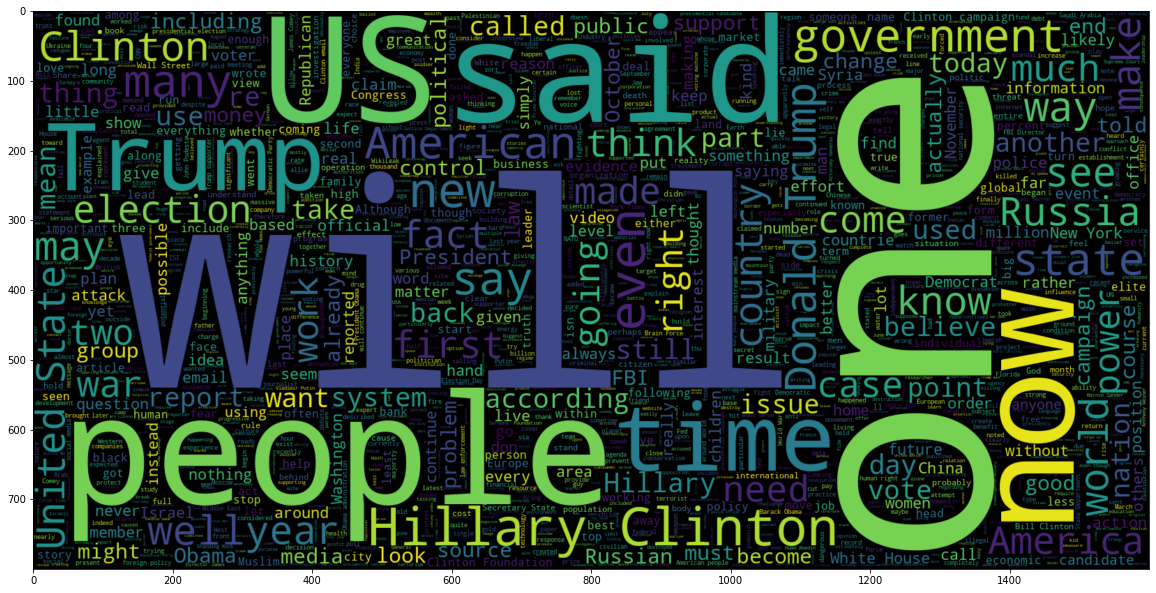

In [6]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 'FAKE'].text))
plt.imshow(wc , interpolation = 'bilinear')

> Extracting information words from official news (*real news*) and organize them by frequency

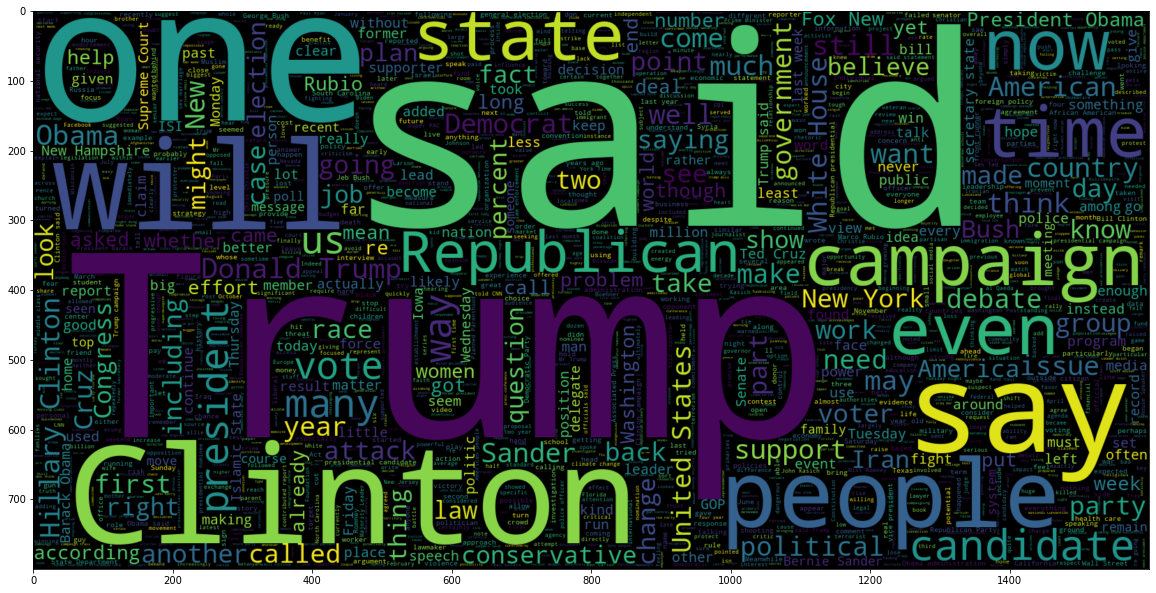

In [7]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 'REAL'].text))
plt.imshow(wc , interpolation = 'bilinear')

## Exploratory Data Analysis (EDA)

In [8]:
df.head()

Unnamed: 0  ... label
0        8476  ...  FAKE
1       10294  ...  FAKE
2        3608  ...  REAL
3       10142  ...  FAKE
4         875  ...  REAL

[5 rows x 4 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


Checking Null Values

In [10]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

Overall we are going to use 3171 fake news dataset and 3164 real news dataset on this experiment

REAL    3171
FAKE    3164
Name: label, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


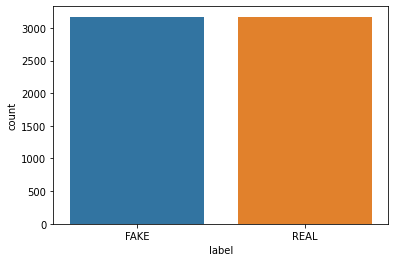

In [11]:
print(df.label.value_counts())
sns.countplot(df.label)

# TEXT DATA PREPROCESSING

1) Converting all text data to lowercase.

In [12]:
df.text = df.text.str.lower()

2) Removing all non alphabetical letters.

In [13]:
df.text = df.text.str.replace("[^a-zA-Z#]"," ")

3) Tokenizing dataset.

In [14]:
for i in range(len(df)):
  df.text[i] = word_tokenize(df.text[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


--> Results after doing tokenization:

In [15]:
df.text

0       [daniel, greenfield, a, shillman, journalism, ...
1       [google, pinterest, digg, linkedin, reddit, st...
2       [u, s, secretary, of, state, john, f, kerry, s...
3       [kaydee, king, kaydeeking, november, the, less...
4       [it, s, primary, day, in, new, york, and, fron...
                              ...                        
6330    [the, state, department, told, the, republican...
6331    [the, p, in, pbs, should, stand, for, plutocra...
6332    [anti, trump, protesters, are, tools, of, the,...
6333    [addis, ababa, ethiopia, president, obama, con...
6334    [jeb, bush, is, suddenly, attacking, trump, he...
Name: text, Length: 6335, dtype: object

4) Lemmatize all words in the dataset using WordNet. This lemmatizer will lemmatize the word based its part-of-speech (POS) tag.

In [16]:
lemmatizer = WordNetLemmatizer()
for i in range(len(df)):
  pos_tag = [x[1].lower() for x in nltk.pos_tag(df.text[i])]
  for j in range(len(df.text[i])):
    if pos_tag[j].startswith('v'):
      df.text[i][j] = lemmatizer.lemmatize(df.text[i][j], 'v')
    if pos_tag[j].startswith('n'):
      df.text[i][j] = lemmatizer.lemmatize(df.text[i][j], 'n')
    if pos_tag[j].startswith('prp'):
      df.text[i][j] = lemmatizer.lemmatize(df.text[i][j], 's')
    else:
      df.text[i][j] = lemmatizer.lemmatize(df.text[i][j])

5) Removing stopwords

In [17]:
stopwords = set(stopwords.words('english'))
df.text = df.text.apply(lambda x: [i for i in x if i not in stopwords])

6) Add the final result of the processed data to the original dataset.

In [18]:
df['text_processed'] = df.iloc[:,2:-1].apply(lambda x:[" ".join(t) for t in x])

In [19]:
df

Unnamed: 0  ...                                     text_processed
0           8476  ...  daniel greenfield shillman journalism fellow f...
1          10294  ...  google pinterest digg linkedin reddit stumbleu...
2           3608  ...  u secretary state john f kerry say monday stop...
3          10142  ...  kaydee king kaydeeking november lesson tonight...
4            875  ...  primary day new york front runner hillary clin...
...          ...  ...                                                ...
6330        4490  ...  state department tell republican national comm...
6331        8062  ...  p pb stand plutocratic pentagon post oct wikim...
6332        8622  ...  anti trump protester tool oligarchy reform alw...
6333        4021  ...  addis ababa ethiopia president obama convene m...
6334        4330  ...  jeb bush suddenly attack trump matter jeb bush...

[6335 rows x 5 columns]

### WordCloud Implementation

Visualizing every word's frequency on the fake news documents using WordCloud.

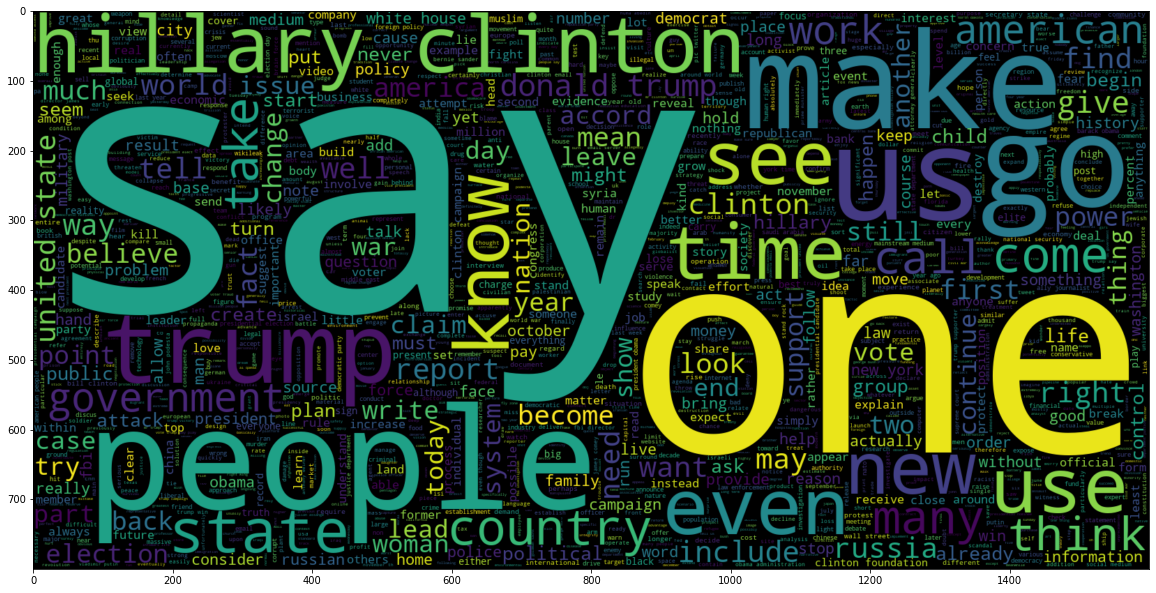

In [20]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 'FAKE'].text_processed))
plt.imshow(wc , interpolation = 'bilinear')

Visualizing every word's frequency on the real news documents using WordCloud.

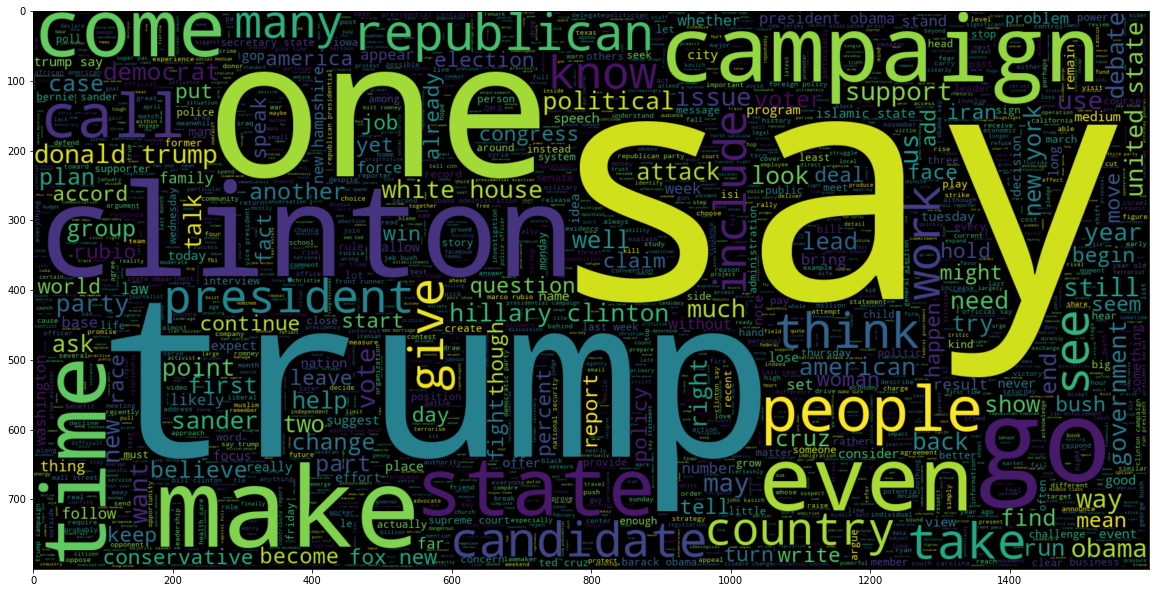

In [21]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 'REAL'].text_processed))
plt.imshow(wc , interpolation = 'bilinear')

^ From the WordCloud visualization above, it can be concluded that there is a lot of news data that raises the words 'say', 'trump', and 'people', both on hoax news and original news.

## DATA PREPROCESSING

1) Encoding label.

In [22]:
x = df.iloc[:,2:-2]
y = df.iloc[:,-2:-1]

y = LabelEncoder().fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2) Split dataset into training and testing data.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

3) Copy the train and test dataset for Word2Vec embedding.

In [24]:
w2v_x_train = x_train.copy()
x_train = x_train.apply(lambda x:[" ".join(t) for t in x])

In [25]:
w2v_x_test = x_test.copy()
x_test = x_test.apply(lambda x:[" ".join(t) for t in x])

## TF-IDF VECTORIZER

In [26]:
vectorizer = TfidfVectorizer()

In [27]:
vectorizer.fit(x_train['text'])

TfidfVectorizer()

In [28]:
x_train_tfidf = vectorizer.transform(x_train['text'])
x_test_tfidf = vectorizer.transform(x_test['text'])

### 1) SVM model

In [29]:
final = pd.DataFrame(columns = ['name','accuracy','precision','recall','f1-score'])

In [30]:
svm = SVC()
svm.fit(x_train_tfidf, y_train)
y_pred = svm.predict(x_test_tfidf)
report = classification_report(y_pred,y_test, output_dict = True)

In [31]:
svm_data = {
    'name' : 'TF-IDF + SVM',
    'accuracy' : report['accuracy'],
    'precision' : report['macro avg']['precision'],
    'recall' : report['macro avg']['recall'],
    'f1-score' : report['macro avg']['f1-score']
}

6) Creating Naive Bayes model

In [32]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred = mnb.predict(x_test_tfidf)
report = classification_report(y_pred,y_test, output_dict = True)

In [33]:
nb_data = {
    'name' : 'TF-IDF + MNB',
    'accuracy' : report['accuracy'],
    'precision' : report['macro avg']['precision'],
    'recall' : report['macro avg']['recall'],
    'f1-score' : report['macro avg']['f1-score']
}

7) Creating Logistic Regression model

In [34]:
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
y_pred = lr.predict(x_test_tfidf)
report = classification_report(y_pred,y_test, output_dict = True)

### RESULTS 

In [35]:
lr_data = {
    'name' : 'TF-IDF + Logistic Regression',
    'accuracy' : report['accuracy'],
    'precision' : report['macro avg']['precision'],
    'recall' : report['macro avg']['recall'],
    'f1-score' : report['macro avg']['f1-score']
}

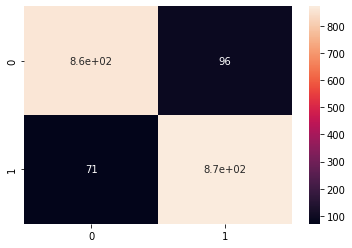

In [36]:
final = final.append(svm_data,ignore_index=True)
cm_svm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm_svm, annot = True)

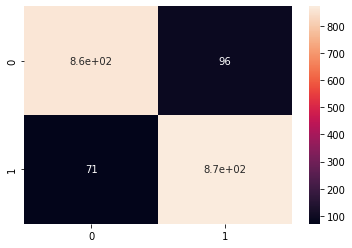

In [37]:
final = final.append(nb_data,ignore_index=True)
cm_mnb = confusion_matrix(y_pred,y_test)
sns.heatmap(cm_mnb, annot = True) # pindahin ke bawah

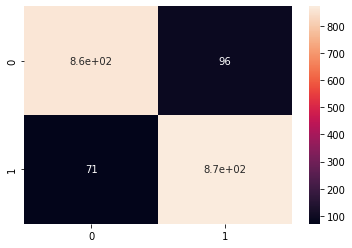

In [38]:
final = final.append(lr_data,ignore_index=True)
cm_lr = confusion_matrix(y_pred,y_test)
sns.heatmap(cm_lr, annot = True) # pindahin ke bawah

## Word2Vec

In [39]:
size = 100
window = 5
min_count = 1
workers = 2

Initializing and training&nbsp;the&nbsp;model&nbsp;using&nbsp;Word2Vec&nbsp;function&nbsp;from&nbsp;gensim&nbsp;library.

In [40]:
w2v_model = Word2Vec(x['text'], min_count = min_count, size = size, workers = workers, window = window)

In [41]:
w2v_model.train(x['text'],total_examples=len(x['text']),epochs=10)

(26665159, 27421980)

In [42]:
w2v = dict(zip(w2v_model.wv.index2word, w2v_model.wv.syn0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [43]:
keras_tokenizer = Tokenizer()
keras_tokenizer.fit_on_texts(w2v_x_train['text'])

In [44]:
word_index = keras_tokenizer.word_index

In [45]:
w2v_x_train = pad_sequences(keras_tokenizer.texts_to_sequences(w2v_x_train['text']), maxlen=1200)
w2v_x_test = pad_sequences(keras_tokenizer.texts_to_sequences(w2v_x_test['text']), maxlen=1200)

In [46]:
vocab_size = len(keras_tokenizer.word_index) + 1

In [47]:
w2v_x_train.shape

(4434, 1200)

In [48]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [49]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [50]:
# Defining Neural Network
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], input_length=1200, trainable=False))
# LSTM 

model.add(keras.layers.LSTM(units=128,return_sequences=True))
model.add(keras.layers.LSTM(units=128))
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(), loss='binary_crossentropy', metrics=['acc'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1200, 100)         4594700   
                                                                 
 lstm (LSTM)                 (None, 1200, 128)         117248    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,851,853
Trainable params: 257,153
Non-trainable params: 4,594,700
_________________________________________________________________


In [52]:
hist = model.fit(w2v_x_train, y_train, epochs=10 ,batch_size = 32,validation_data=(w2v_x_test,y_test) ,verbose=1)

Epoch 1/10
139/139 [==============================] - 62s 400ms/step - loss: 0.6307 - acc: 0.6843 - val_loss: 0.5658 - val_acc: 0.7317
Epoch 2/10
139/139 [==============================] - 55s 393ms/step - loss: 0.5247 - acc: 0.7675 - val_loss: 0.4864 - val_acc: 0.7743
Epoch 3/10
139/139 [==============================] - 55s 394ms/step - loss: 0.4405 - acc: 0.8072 - val_loss: 0.4384 - val_acc: 0.8022
Epoch 4/10
139/139 [==============================] - 55s 395ms/step - loss: 0.3776 - acc: 0.8324 - val_loss: 0.4584 - val_acc: 0.7991
Epoch 5/10
139/139 [==============================] - 55s 394ms/step - loss: 0.3494 - acc: 0.8507 - val_loss: 0.3590 - val_acc: 0.8427
Epoch 6/10
139/139 [==============================] - 55s 394ms/step - loss: 0.3409 - acc: 0.8536 - val_loss: 0.3689 - val_acc: 0.8359
Epoch 7/10
139/139 [==============================] - 55s 394ms/step - loss: 0.3292 - acc: 0.8633 - val_loss: 0.4049 - val_acc: 0.8353
Epoch 8/10
139/139 [==============================] - 5

In [53]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

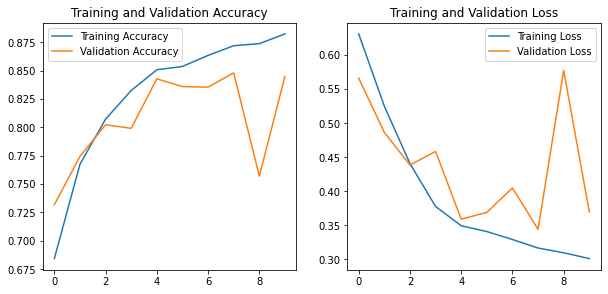

In [54]:
epochs_range = range(len(acc))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

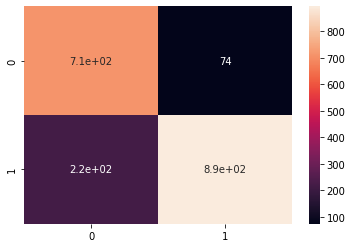

In [55]:
y_pred = [hardlim(i) for i in model.predict(w2v_x_test)]
report = classification_report(y_pred,y_test, output_dict = True)

data = {
    'name' : 'Word2Vec + LSTM(128)(64)',
    'accuracy' : report['accuracy'],
    'precision' : report['macro avg']['precision'],
    'recall' : report['macro avg']['recall'],
    'f1-score' : report['macro avg']['f1-score']
}
final = final.append(data,ignore_index=True)
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot = True)

<Figure size 720x720 with 0 Axes>

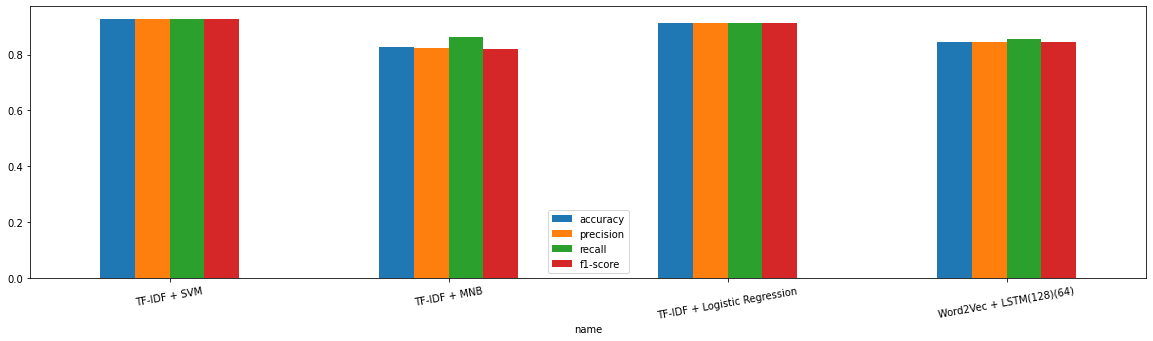

In [56]:
plt.figure(figsize=(10, 10))

final.plot.bar(rot=10, figsize=(20,5), x = 'name')

In [57]:
final

name  accuracy  precision    recall  f1-score
0                  TF-IDF + SVM  0.925302   0.925607  0.925591  0.925302
1                  TF-IDF + MNB  0.826407   0.823539  0.861236  0.821181
2  TF-IDF + Logistic Regression  0.912151   0.912364  0.912250  0.912149
3      Word2Vec + LSTM(128)(64)  0.844819   0.843342  0.853823  0.843383

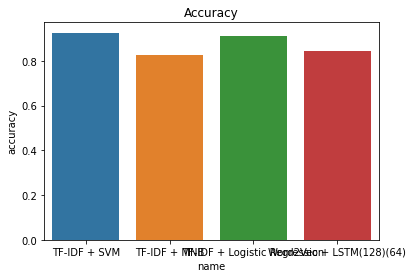

In [58]:
plt.title('Accuracy')
sns.barplot(x = final['name'],y = final['accuracy'])

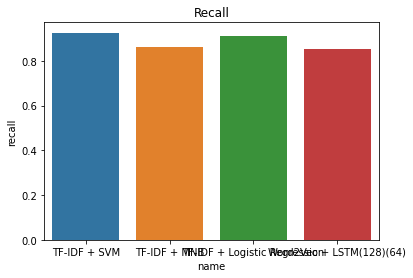

In [59]:
plt.title('Recall')
sns.barplot(x = final['name'],y = final['recall'])

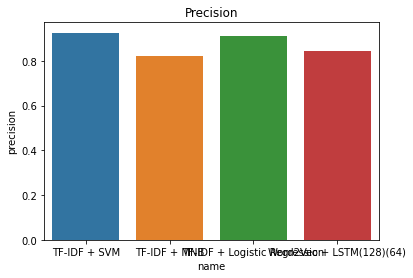

In [60]:
plt.title('Precision')
sns.barplot(x = final['name'],y = final['precision'])

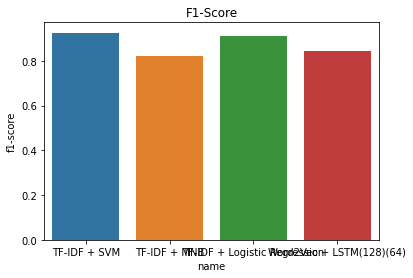

In [62]:
plt.title('F1-Score')
sns.barplot(x = final['name'],y = final['f1-score'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0d6651d-8b3e-4312-8ef5-a336969ee25a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>